# **Face Mask Detection with CNN**
Notebook ini digunakan untuk membangun model CNN untuk mendeteksi apakah seseorang memakai masker atau tidak.

Dataset yang digunakan https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

## **1. Setup & Persiapan Dataset**

### **1.1 Install & Setup Kaggle API**

In [5]:
!pip install kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


### **1.2 Download Dataset**

In [7]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\USER\anaconda3\Scripts\kaggle.exe\__main__.py", line 7, in <module>
  File "C:\Users\USER\anaconda3\Lib\site-packages\kaggle\cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [8]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = 'face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


## **2. Import Library**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

## **3. Eksplorasi & Preprocessing Dataset**

In [ ]:
with_mask_files = os.listdir('./data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [ ]:
without_mask_files = os.listdir('./data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [14]:
print('number of mask images:', len(with_mask_files))
print('number of without mask images:', len(without_mask_files))

number of mask images: 3725
number of without mask images: 3828


**Creating Labels for the two class of images**

1.   with mask --> 1
2.   without mask --> 0



In [15]:
# create the labels

with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [17]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

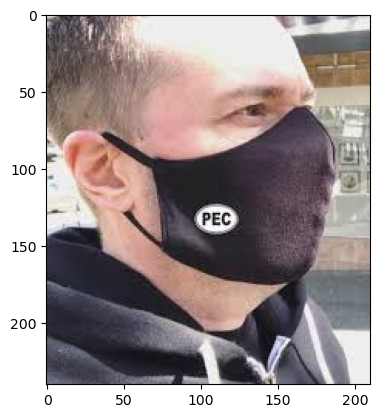

In [ ]:
# displaying with mask image

img = mpimg.imread('./data/with_mask/with_mask_2637.jpg')
imgplot  = plt.imshow(img)
plt.show()

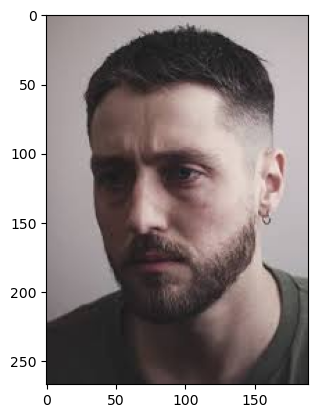

In [ ]:
# displaying without mask image

img = mpimg.imread('./data/without_mask/without_mask_3414.jpg')
imgplot  = plt.imshow(img)
plt.show()

**Image processing**


1.   Resize the images
2.   Convert the images to numpy arrays



In [ ]:
# convert images to numpy arrays

with_mask_path = './data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = './data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

c:\Users\USER\anaconda3\Lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
len(data)

7553

In [22]:
type(data)

list

In [23]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

## **4. Dataset Pipeline**

In [26]:
# converting images list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)

(7553, 128, 128, 3)


In [29]:
print(Y.shape)

(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [33]:
X_train[[0]]

array([[[[226, 234, 201],
         [211, 216, 188],
         [188, 188, 169],
         ...,
         [186, 181, 165],
         [179, 175, 150],
         [166, 181, 136]],

        [[224, 228, 218],
         [201, 204, 195],
         [201, 199, 192],
         ...,
         [197, 190, 182],
         [175, 170, 153],
         [162, 180, 143]],

        [[205, 204, 212],
         [221, 220, 226],
         [195, 192, 196],
         ...,
         [183, 174, 173],
         [172, 167, 159],
         [181, 199, 171]],

        ...,

        [[156, 176, 197],
         [159, 180, 196],
         [164, 185, 196],
         ...,
         [ 89,  99,  71],
         [106, 113,  83],
         [ 99, 103,  68]],

        [[151, 177, 196],
         [167, 190, 208],
         [174, 192, 210],
         ...,
         [106, 113,  80],
         [ 99, 104,  64],
         [ 98,  98,  41]],

        [[162, 192, 210],
         [177, 199, 220],
         [175, 189, 213],
         ...,
         [103, 107,  70],
        

In [34]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

## **5. Membangun Arsitektur CNN**

**Building a Convolutional Neural Networks (CNN)**

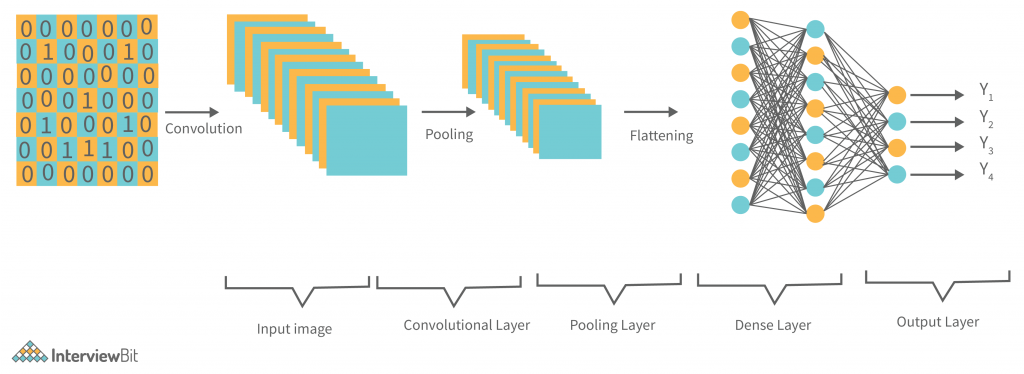

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **6. Compile dan Train Model**

In [38]:
# compile the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [39]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 34s 186ms/step - acc: 0.6768 - loss: 0.6862 - val_acc: 0.8843 - val_loss: 0.2785
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - acc: 0.8816 - loss: 0.2976 - val_acc: 0.9190 - val_loss: 0.2609
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - acc: 0.8944 - loss: 0.2699 - val_acc: 0.9190 - val_loss: 0.2230
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 177ms/step - acc: 0.9053 - loss: 0.2208 - val_acc: 0.9322 - val_loss: 0.2136
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - acc: 0.9255 - loss: 0.1844 - val_acc: 0.9289 - val_loss: 0.2333
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - acc: 0.9254 - loss: 0.1738 - val_acc: 0.9405 - val_loss: 0.2498
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 177ms/step - acc: 0.9529 - loss: 0.1202 - val_acc: 0.9339 - val_loss: 0.2478
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 31s 180ms/step - acc: 0.9548 - loss: 0.1236 - val_acc: 0.9388 - val_loss: 0.2404
Epoch 9/10
170/170 ━━━━━━━━━━━━━

## **7. Evaluasi Model**

In [41]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.9328 - loss: 0.2265
Test accuracy = 0.9324950575828552


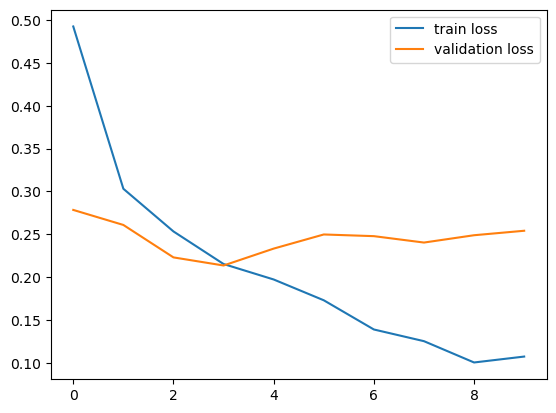

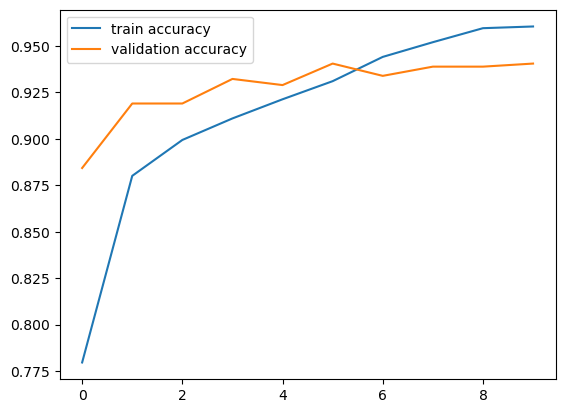

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## **8. Simpan Model**

In [ ]:
# Simpan model
model_path = os.path.join(model_dir, 'face_mask_model.h5')
model.save(model_path)

print(f"✅ Model saved to: {model_path}")

## **9. Kesimpulan**

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Daftar path gambar
image_paths = [
    "image/image.png",         # Gambar tanpa masker
    "image/wear mask.jpg"      # Gambar dengan masker
]

# Label hasil
labels = ["Without Mask", "With Mask"]

# Loop untuk tiap gambar
for image_path in image_paths:
    print(f"\nMemproses gambar: {image_path}")
    
    # Baca gambar
    input_image = cv2.imread(image_path)

    if input_image is None:
        print("Gambar tidak ditemukan di path:", image_path)
        continue

    # Konversi ke RGB untuk ditampilkan
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
    
    # Tampilkan gambar
    plt.imshow(input_image_rgb)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Preprocessing: resize, scale, reshape
    input_image_resized = cv2.resize(input_image_rgb, (128, 128))
    input_image_scaled = input_image_resized / 255.0
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

    # Prediksi
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = np.argmax(input_prediction)

    # Hasil
    print("Raw Prediction:", input_prediction)
    print("Prediction Label:", labels[input_pred_label])



Memproses gambar: image/image.png
Gambar tidak ditemukan di path: image/image.png

Memproses gambar: image/wear mask.jpg
Gambar tidak ditemukan di path: image/wear mask.jpg
